In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

#  https://mappingpoliceviolence.org/
data = pd.read_excel('new source_final project.xlsx')

In [2]:
data.columns # look at all my colmuns 

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)', 'Year',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Unnamed: 25'],
      dtype='object')

In [3]:
# rename my columns
data.columns = ['Name', 'Age', 'Gender', 'Race',
       'URL of image of victim', 'Date', 'Year',
       'Street Address', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Unnamed: 25']

In [4]:
# get rid of colmuns that i don't want
data = data [['Name', 'Age', 'Gender', 'Race', 'Date', 'Year',
       'Street Address', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)']]

In [5]:
#take a look at the object types 
# Age needs to be a int so I can work with it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 17 columns):
Name                                                  6833 non-null object
Age                                                   6651 non-null float64
Gender                                                6832 non-null object
Race                                                  6833 non-null object
Date                                                  6833 non-null datetime64[ns]
Year                                                  6833 non-null int64
Street Address                                        6754 non-null object
City                                                  6827 non-null object
State                                                 6833 non-null object
Zipcode                                               6790 non-null float64
County                                                6821 non-null object
Agency responsible for death                          6820 

In [6]:
# need to drop all the values of 'unknown' under age...it is only 32 rows
# this var will look through the data frame under the age colmun and get he index of values with 'unknown'
#this worked...you can see we have less objects under the age column than we did before
data['Age'] = data['Age'].astype(float)
data['Age'].fillna(data['Age'].mean(), inplace = True)
# also fill in the blanks for weapon source with "unarmed"
data['Alleged Weapon (Source: WaPo)'].fillna(value = 'unarmed', inplace = True)
# now lets check to see if things worked and the nulls are gone
data.isna().sum()

Name                                                    0
Age                                                     0
Gender                                                  1
Race                                                    0
Date                                                    0
Year                                                    0
Street Address                                         79
City                                                    6
State                                                   0
Zipcode                                                43
County                                                 12
Agency responsible for death                           13
Official disposition of death (justified or other)    289
Criminal Charges?                                       0
mental illness?                                         9
Unarmed                                                79
Alleged Weapon (Source: WaPo)                           0
dtype: int64

In [7]:
#  changed age to int  
data['Age'] = data['Age'].astype(int)
#  switching year to a cateogry so i can plot against it?
data['Year'] = data['Year'].astype('int')
o2c = data.select_dtypes(['object']).columns
#  look at all of the objects in the dataframe and make them a category
for o in o2c:
    data[o] = data[o].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6833 entries, 0 to 6832
Data columns (total 17 columns):
Name                                                  6833 non-null object
Age                                                   6833 non-null int32
Gender                                                6832 non-null object
Race                                                  6833 non-null object
Date                                                  6833 non-null datetime64[ns]
Year                                                  6833 non-null int32
Street Address                                        6754 non-null object
City                                                  6827 non-null object
State                                                 6833 non-null object
Zipcode                                               6790 non-null float64
County                                                6821 non-null object
Agency responsible for death                          6820 no

In [8]:
# i need add a column to my df 
# find the legnth of data series
# then use np.random of the length of the data series
#  slength = len(data)
#  data['ID'] = np.random.randint(slength) # these aren't unique numbers but i don't think it matters
# d = np.random.randint(slength)

data['Count'] = 1

#  use data.head() to see if the column is there


Text(0.5, 0, '')

C:\Users\EDay\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


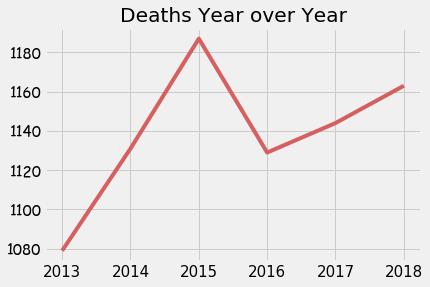

In [9]:
#  This will give me a count for all colmuns by the year
#  why when i put this as just a line plot the years go away?!
year = data.groupby('Year')
year.count()
#  this will give me count by just the name column
year_plot = data['Name'].groupby(data['Year']).count()
plt.style.use("fivethirtyeight")
year_plot.plot(kind = 'line', title = 'Deaths Year over Year',color='#d65f5f')
#  need to have INT for year or on the bottom of the line graph for it to work
# if you want to see the number counts just run the groupby.count() line
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')
plt.xlabel("")


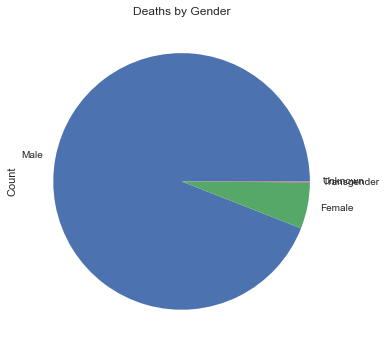

In [10]:
# plot by Gender
# create a var so we can group by gender
gender_plot = data['Count'].groupby(data['Gender']).sum()
plt.style.use("seaborn")
# redefine var so we are sorting the values
gender_plot = gender_plot.sort_values(ascending = False)
gender_plot.plot(kind = 'pie', title = 'Deaths by Gender')
plt.style.use('fivethirtyeight')



# Create Variable that groups by race
race_plot = data['Name'].groupby(data['Race']).count()
# what plot style do we want
plt.style.use("seaborn")
# redefine var so that we are sorting the values
race_plot = race_plot.sort_values(ascending = False)
race_plot.plot(kind = 'bar')
race_plot = plt.style.use('seaborn-notebook')


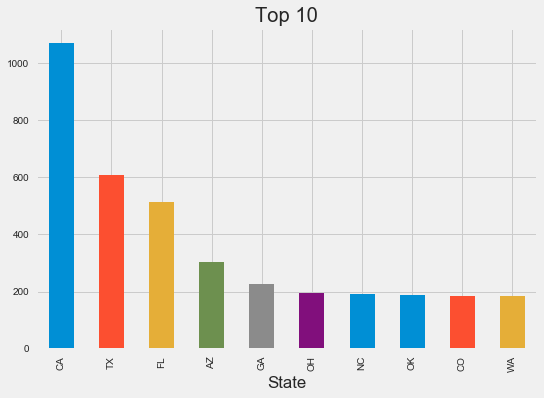

In [11]:
# top 10 states
state_plot = data['Name'].groupby(data['State']).count().nlargest(10)
state_plot.plot(kind = 'bar',title = 'Top 10')
state_plot = plt.style.use('seaborn-notebook')

In [12]:
# replace all NaN weapon values with 'None'
data['Unarmed'].fillna(value = 'Unarmed', inplace = True)
#check to if it worked....should see no nan values
data['Unarmed'].value_counts()


Allegedly Armed    4901
Unarmed            1155
Vehicle             451
Unknown             326
Name: Unarmed, dtype: int64

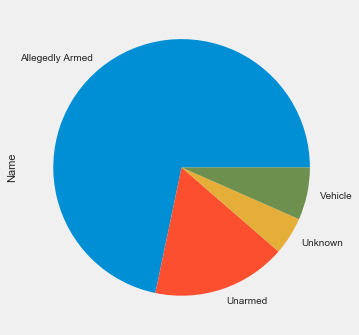

In [13]:
Unarmed = data['Name'].groupby(data['Unarmed']).count()
Unarmed.plot(kind = 'pie')
Unarmed = plt.style.use('seaborn-notebook')



In [14]:
# can we plot the total deahts by population?
# https://www.census.gov/quickfacts/fact/table/US/PST045218
# white = 196,300,460
# black = 42,531,766
# hispanic = 58,890,138
# asian - 19,630,046
# N.A - 4,253,176

#  want to make a line graph for 2018 death rate
race = data.groupby('Race')


data['Race'].value_counts()
data.groupby('Year',)['Race'].value_counts()
    

Year  Race           
2013  White              524
      Black              343
      Hispanic           169
      Asian               25
      Native American     18
2014  White              553
      Black              341
      Hispanic           190
      Asian               24
      Native American     23
2015  White              581
      Black              346
      Hispanic           206
      Asian               37
      Native American     17
2016  White              574
      Black              301
      Hispanic           199
      Native American     34
      Asian               21
2017  White              541
      Black              295
      Hispanic           239
      Native American     49
      Asian               20
2018  White              554
      Black              294
      Hispanic           189
      Native American    104
      Asian               22
Name: Race, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

C:\Users\EDay\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


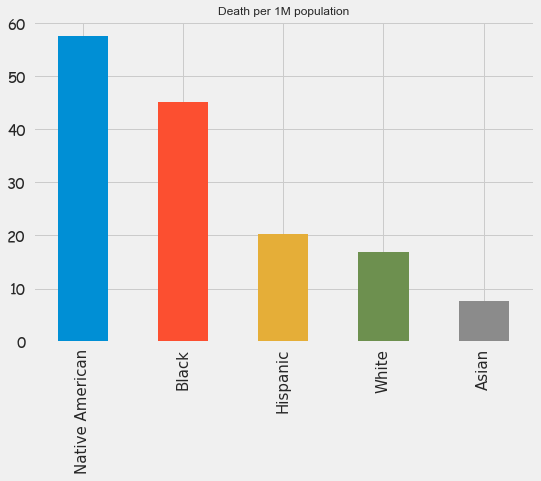

In [15]:
deaths = [3327/196300460*1000000,1920/42531766*1000000,1192/58890138*1000000,
          245/4253176*1000000,149/19630046*1000000]
race = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
year = ['2013', '2014', '2015', '2016', '2017', '2018']
deaths = pd.Series(deaths,race).sort_values(ascending = False)
deaths.plot(kind = 'bar', title = 'Death per 1M population')
deaths.sort_values(ascending = False)
plt.style.use("fivethirtyeight")
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')
#applyto
#take column and create a list with that

In [16]:
#native american by state

In [17]:
#  Native american by age

Text(0.5, 0, 'Race')

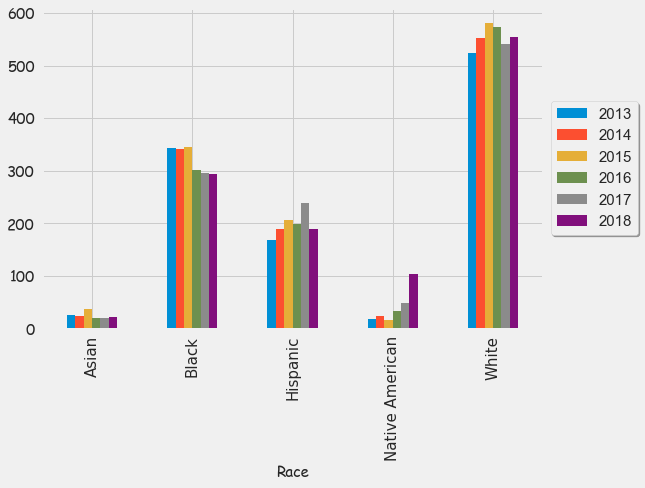

In [18]:
year_race = data.groupby(['Race','Year'])['Count'].size().sort_values(ascending = False).unstack().plot(kind='bar',stacked=False)

year_race = data.reindex(sorted(data.columns, reverse=True), axis=1)
year_race = plt.style.use('fivethirtyeight')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')
plt.legend(frameon = True, fancybox = True, shadow = True,\
           framealpha = 1, prop = {'size':15},loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Race', fontsize = 15,fontname = 'Comic Sans MS')
#  unstack is stacking my groups together.
# race_plot.sort_values(ascending = False)
# plt.style.available use this to see the available plot styles-

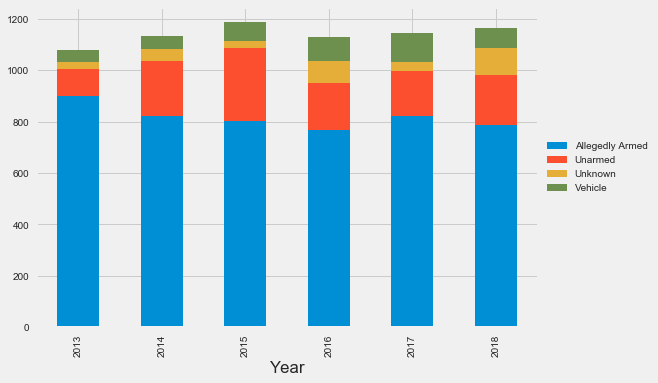

In [19]:
unarmed_year = data.groupby(['Year','Unarmed'])['Name'].size().unstack().plot(kind='bar',stacked=True)
unarmed = plt.style.use('seaborn-notebook')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

(array([ 0.,  2.,  4.,  6.,  8., 10.]), <a list of 6 Text xticklabel objects>)

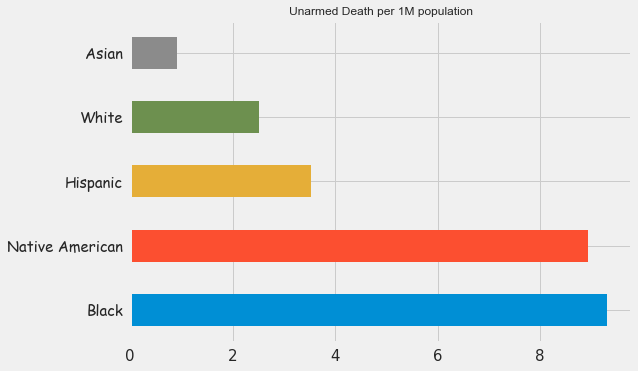

In [20]:
#def test():    
data[data['Unarmed'] == 'Unarmed'].groupby(data['Race']).count()
deaths = [495/196300460*1000000,396/42531766*1000000,208/58890138*1000000,
         38/4253176*1000000,18/19630046*1000000]
race = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
unarmed = pd.Series(deaths,race).sort_values(ascending = False)
unarmed.plot(kind = 'barh', title = 'Unarmed Death per 1M population')
unarmed.sort_values(ascending = False)
plt.style.use("fivethirtyeight")
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')


#unarmed1 = data.groupby(['Year','Unarmed'])['Race']
#unarmed1.value_counts()
#test()

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 <a list of 10 Text xticklabel objects>)

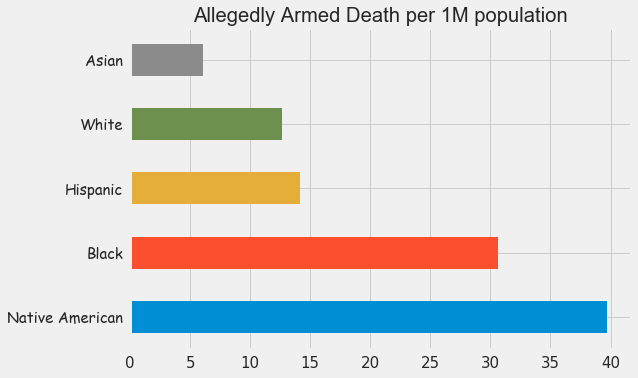

In [21]:
deaths2 = [2478/196300460*1000000,1303/42531766*1000000,831/58890138*1000000,
          169/4253176*1000000,120/19630046*1000000]
race = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
year = ['2013', '2014', '2015', '2016', '2017', '2018']
armed = pd.Series(deaths2,race).sort_values(ascending = False)
armed.plot(kind = 'barh', title = 'Allegedly Armed Death per 1M population')
armed.sort_values(ascending = False)
plt.style.use("fivethirtyeight")
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')



In [22]:
data[data['Unarmed'] == 'Allegedly Armed'].groupby(data['Race']).count()


,Name,Age,Gender,Race,Date,Year,Street Address,City,State,Zipcode,County,Agency responsible for death,Official disposition of death (justified or other),Criminal Charges?,mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Count
Race,,,,,,,,,,,,,,,,,,
Asian,120,120,120,120,120,120,120,120,120,120,120,120,111,120,120,120,120,120
Black,1303,1303,1302,1303,1303,1303,1297,1303,1303,1294,1301,1302,1251,1303,1300,1303,1303,1303
Hispanic,831,831,831,831,831,831,823,831,831,825,830,829,791,831,831,831,831,831
Native American,169,169,169,169,169,169,155,168,169,163,166,166,167,169,166,169,169,169
White,2478,2478,2478,2478,2478,2478,2452,2476,2478,2466,2474,2474,2367,2478,2477,2478,2478,2478


In [23]:
data[data['Race'] == 'Black'].groupby(data['State']).count()


,Name,Age,Gender,Race,Date,Year,Street Address,City,State,Zipcode,County,Agency responsible for death,Official disposition of death (justified or other),Criminal Charges?,mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Count
State,,,,,,,,,,,,,,,,,,
AK,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4
AL,50,50,50,50,50,50,49,50,50,50,50,50,49,50,50,50,50,50
AR,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
AZ,38,38,38,38,38,38,37,38,38,38,38,38,38,38,38,38,38,38
CA,197,197,197,197,197,197,197,197,197,196,197,197,187,197,197,197,197,197
CO,17,17,17,17,17,17,17,17,17,16,17,17,16,17,17,17,17,17
CT,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
DC,22,22,22,22,22,22,22,22,22,22,22,22,20,22,22,22,22,22
DE,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [24]:
#  Unarmed = data['Name'].groupby(data['Unarmed']).count()

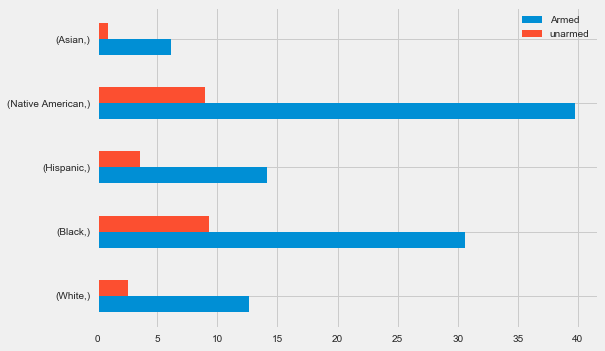

In [25]:
#  not using this chart...i don't think it really works
unarmed_list = [495/196300460*1000000,396/42531766*1000000,208/58890138*1000000,
         38/4253176*1000000,18/19630046*1000000]
armed = [2478/196300460*1000000,1303/42531766*1000000,831/58890138*1000000,
          169/4253176*1000000,120/19630046*1000000]
race = ['White', 'Black', 'Hispanic', 'Native American', 'Asian']
df = pd.DataFrame(armed, index =[race], columns =['Armed'])
df['unarmed'] = unarmed_list
plt.style.use("fivethirtyeight")
df.plot(kind='barh')


In [26]:
#  https://www.w3schools.com/w3css/tryit.asp?filename=tryw3css_templates_dark_portfolio&stacked=h

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

C:\Users\EDay\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Comic Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


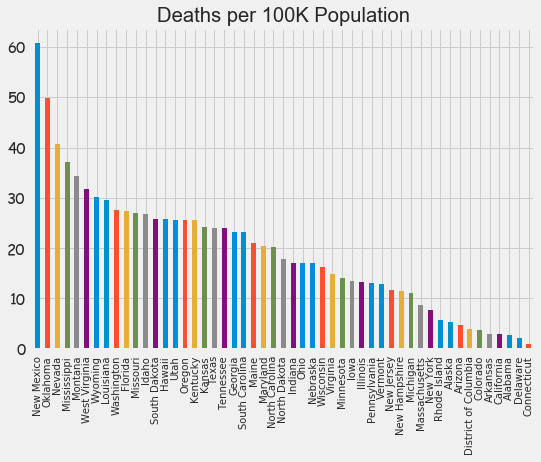

In [27]:
data.groupby('State',)['Name'].value_counts()
data['State'].value_counts()

full_states = [133/4779736*100000,38/710231*100000,305/6392017*100000
,87/2915918*100000,1069/37253956*100000,185/5029196*100000,35/3574097*100000
,20/897934*100000,24/601723*100000,514/18801310*1000000,225/9687653*1000000,
35/1360301*1000000,42/1567582*1000000,171/12830632*1000000,111/6483802*1000000,
41/3046355*1000000,69/2853118*1000000,111/4339367*1000000,134/4533372*1000000,
28/1328361*1000000,118/5773552*1000000,57/6547629*1000000,110/9883640*1000000,
75/5303925*1000000,110/2967297*1000000,162/5988927*1000000,34/989415*1000000,
31/1826341*1000000,110/2700551*1000000,15/1316470*1000000,103/8791894*1000000,
125/2059179*1000000,148/19378102*1000000,192/9535483*1000000,12/672591*1000000,
196/11536504*1000000,187/3751351*1000000,98/3831074*1000000,165/12702379*1000000,
6/1052567*1000000,107/4625364*1000000,21/814180*1000000,152/6346105*1000000,
606/25145561*1000000,71/2763885*1000000,8/625741*1000000,119/8001024*1000000,
185/6724540*1000000,59/1852994*1000000,92/5686986*1000000,17/563626*1000000
]

states = ['Alabama',
'Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
'District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois',
'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
'Massachusetts','Michigan','Minnesota','Mississippi','Missouri',
'Montana','Nebraska','Nevada','New Hampshire','New Jersey',
'New Mexico','New York','North Carolina','North Dakota',
'Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island'
,'South Carolina','South Dakota','Tennessee','Texas','Utah',
'Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

df_state = pd.Series(full_states,states).sort_values(ascending = False)

df_state.plot(kind = 'bar', title = 'Deaths per 100K Population')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 10, fontname = 'Comic Sans')



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

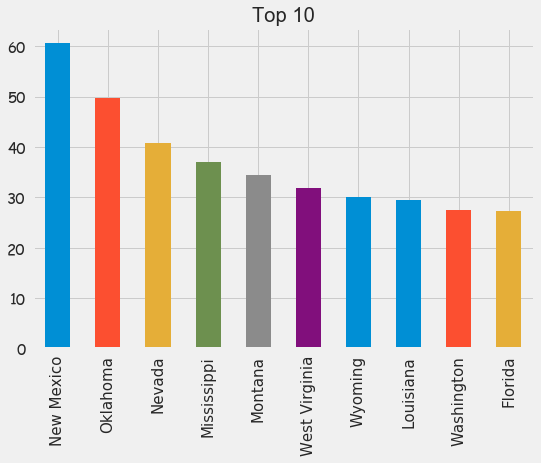

In [28]:
df_state = pd.Series(full_states,states).sort_values(ascending = False).nlargest(10)
df_state.plot(kind = 'bar', title = 'Top 10')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

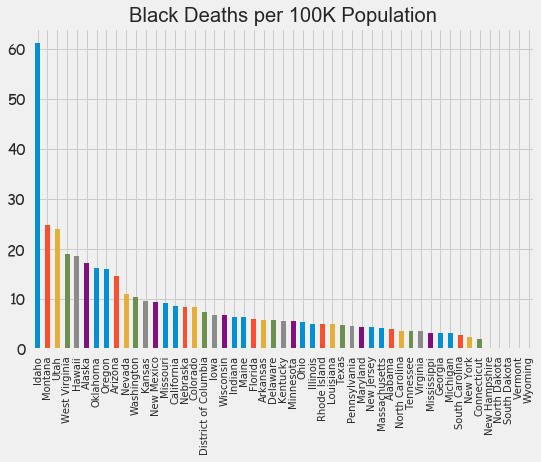

In [29]:
#  states by black
black_pop = [50/1251311*100000,4/23263*100000,38/259008*100000,26/449895*100000,197/2299072*100000,
17/201737*100000,7/362296*100000,11/191814*100000,22/300000*100000,
181/2999862*100000,99/3150435*100000,4/21424*100000,6/9810*100000,94/1866414*100000,
38/591397*100000,
6/89148*100000,16/167864*100000,19/337520*100000,71/1452396*100000,
1/15707*100000,74/1700298*100000,18/434398*100000,43/1400362*100000,
15/274412*100000,35/1074200*100000,
65/704043*100000,1/4027*100000,7/82885*100000,24/218626*100000,0,
52/1204826*100000,4/42550*100000,71/3073800*100000,75/2048628*100000,0,
76/1407681*100000,45/277644*100000,11/69206*100000,62/1377689*100000,
3/60189*100000,36/1290684*100000,0,38/1055689*100000,141/2979598*100000,
7/29287*100000,0,54/1551399*100000,25/240042*100000,
12/63124*100000,24/359148*100000,0]

black_state = pd.Series(black_pop,states).sort_values(ascending = False)

black_state.plot(kind = 'bar', title = 'Black Deaths per 100K Population')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 10, fontname = 'Comic Sans')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

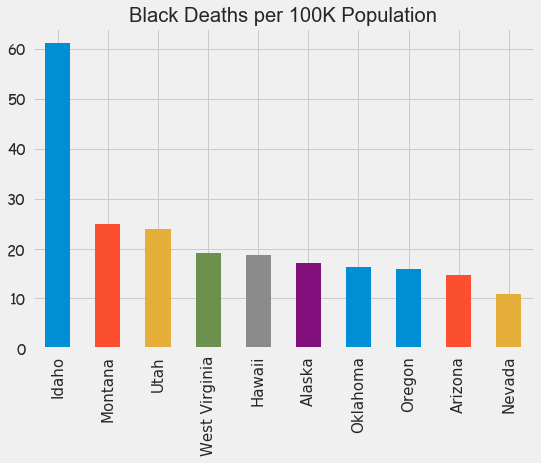

In [30]:
black_state = pd.Series(black_pop,states).sort_values(ascending = False).nlargest(10)
black_state.plot(kind = 'bar', title = 'Black Deaths per 100K Population')
#plt.xlabel('State', fontsize = 25, color = 'Red')
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')


In [31]:
counts = data['Age'].value_counts()
sns.lmplot(data = data, x ='Age', y= counts, 
                 fit_reg = False, hue = 'Race',
                 height = 6 ,aspect = 1)


ValueError: setting an array element with a sequence

In [ ]:
counts

In [ ]:
counts = data['Age'].value_counts()
#counts.plot(king = 'scatter', x = 'Age', y = 'Count')

# In [64]: df.plot.scatter(x='a', y='b');
# df.plot(kind='scatter', x='col1', y='col2', s=df.col3)



In [ ]:
year_race = data.groupby(['Year','Race'])['Count'].size().sort_values(ascending = False).unstack().plot()

year_race = data.reindex(sorted(data.columns, reverse=True), axis=1)
year_race = plt.style.use('fivethirtyeight')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.yticks(fontsize = 15, fontname = 'Comic Sans MS')
plt.xticks(fontsize = 15, fontname = 'Comic Sans')
plt.xlabel("")
plt.title('Deaths Year Over Year')

plt.legend(frameon = True, fancybox = True, shadow = True,\
           framealpha = 1, prop = {'size':15},loc='center left', bbox_to_anchor=(1.0, 0.5))

In [32]:
def age(AGE):
    if data['Age'] <= 18:
        return "18 or younger"
    elif data['Age'] <= 30 and 'Age'> 18:
        return "Between 19-30"
    else:
        return "Awesome"

data["Age"].apply(age).value_counts().plot(kind="bar")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().